# 1. load data

In [1]:
import pandas as pd

# making data frame from csv file 
df = pd.read_csv('abstract.csv',encoding = "ISO-8859-1")

In [2]:
df.head()

,Title,Abstract,FOR,field_name
0,Histograms of oriented gradients for human det...,We study the question of feature sets for robu...,801,Artificial Intelligence and Image Processing
1,Deep residual learning for image recognition,Deeper neural networks are more difficult to t...,801,Artificial Intelligence and Image Processing
2,Beyond bags of features: Spatial pyramid match...,This paper presents a method for recognizing s...,801,Artificial Intelligence and Image Processing
3,Going deeper with convolutions,We propose a deep convolutional neural network...,801,Artificial Intelligence and Image Processing
4,Rich feature hierarchies for accurate object d...,"Object detection performance, as measured on t...",801,Artificial Intelligence and Image Processing


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27470 entries, 0 to 27469
Data columns (total 4 columns):
Title         27470 non-null object
Abstract      27470 non-null object
FOR           27470 non-null int64
field_name    27470 non-null object
dtypes: int64(1), object(3)
memory usage: 858.5+ KB


In [4]:
df.shape

(27470, 4)

In [5]:
df.columns

Index(['Title', 'Abstract', 'FOR', 'field_name'], dtype='object')

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6)) # 800 * 600

df.groupby('field_name').Abstract.count().plot.bar(ylim=0)

plt.show() # run 2 times, if the figure doesn't show up

<Figure size 800x600 with 1 Axes>

# 2. select volumns


In [7]:
selected_columns = ["Abstract", "field_name"]

df = df[selected_columns]

In [8]:
df.shape

(27470, 2)

In [9]:
df.columns

Index(['Abstract', 'field_name'], dtype='object')

In [10]:
df.head()

,Abstract,field_name
0,We study the question of feature sets for robu...,Artificial Intelligence and Image Processing
1,Deeper neural networks are more difficult to t...,Artificial Intelligence and Image Processing
2,This paper presents a method for recognizing s...,Artificial Intelligence and Image Processing
3,We propose a deep convolutional neural network...,Artificial Intelligence and Image Processing
4,"Object detection performance, as measured on t...",Artificial Intelligence and Image Processing


# 3. add a new id column

In [11]:
# add a new column
# add a column encoding the product as an integer 
df['category_id'] = pd.factorize(df['field_name'])[0]

In [12]:
df.head(5)

,Abstract,field_name,category_id
0,We study the question of feature sets for robu...,Artificial Intelligence and Image Processing,0
1,Deeper neural networks are more difficult to t...,Artificial Intelligence and Image Processing,0
2,This paper presents a method for recognizing s...,Artificial Intelligence and Image Processing,0
3,We propose a deep convolutional neural network...,Artificial Intelligence and Image Processing,0
4,"Object detection performance, as measured on t...",Artificial Intelligence and Image Processing,0


In [13]:
from io import StringIO

category_id_df = df[['field_name', 'category_id']].drop_duplicates().sort_values('category_id')

category_id_df

,field_name,category_id
0,Artificial Intelligence and Image Processing,0
3949,Computer Software,1
7797,Data Format,2
11778,Distributed Computing,3
15728,Information Systems,4
19700,Library and Information Studies,5
23578,Computation Theory and Mathematics,6


# 4. get two dict

In [14]:
category_to_id = dict(category_id_df.values)
category_to_id

{' Artificial Intelligence and Image Processing ': 0,
 'Computer Software ': 1,
 'Data Format ': 2,
 'Distributed Computing ': 3,
 'Information Systems ': 4,
 'Library and Information Studies ': 5,
 ' Computation Theory and Mathematics ': 6}

In [15]:

id_to_category = dict(category_id_df[['category_id', 'field_name']].values)
id_to_category

{0: ' Artificial Intelligence and Image Processing ',
 1: 'Computer Software ',
 2: 'Data Format ',
 3: 'Distributed Computing ',
 4: 'Information Systems ',
 5: 'Library and Information Studies ',
 6: ' Computation Theory and Mathematics '}

# 5. vecterize the 'Abstract' column data

In [16]:
# configure the weapon


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


count_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=1000,
                                stop_words='english',
                               # max_df = 0.5,
                                min_df = 10)



tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, 
                        max_features=1000,           
                        min_df=5, 
                        norm='l2', 
                        encoding='latin-1', 
                        ngram_range=(1, 2), 
                        stop_words='english')


In [17]:

features = tfidf_vectorizer.fit_transform(df.Abstract).toarray()

features.shape


(27470, 1000)

In [18]:
type(features)

numpy.ndarray

In [19]:
labels = df.category_id

In [20]:
labels.shape

(27470,)

In [21]:
type(labels)

pandas.core.series.Series

In [22]:
# to find the terms that are the most correlated with each of the products:

from sklearn.feature_selection import chi2
import numpy as np

N = 2
for field_name, category_id in sorted(category_to_id.items()):
    
  features_chi2 = chi2(features, labels == category_id)

  indices = np.argsort(features_chi2[0])
    
  feature_names = np.array(tfidf_vectorizer.get_feature_names())[indices]

  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]

  print("# '{}':".format(field_name))
    
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))

  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# ' Artificial Intelligence and Image Processing ':
  . Most correlated unigrams:
       . images
       . image
  . Most correlated bigrams:
       . neural networks
       . state art
# ' Computation Theory and Mathematics ':
  . Most correlated unigrams:
       . log
       . polynomial
  . Most correlated bigrams:
       . lower bound
       . polynomial time
# 'Computer Software ':
  . Most correlated unigrams:
       . code
       . software
  . Most correlated bigrams:
       . akadémiai kiadó
       . open source
# 'Data Format ':
  . Most correlated unigrams:
       . queries
       . query
  . Most correlated bigrams:
       . data sets
       . real world
# 'Distributed Computing ':
  . Most correlated unigrams:
       . wireless
       . sensor
  . Most correlated bigrams:
       . akadémiai kiadó
       . high performance
# 'Information Systems ':
  . Most correlated unigrams:
       . process
       . business
  . Most correlated bigrams:
       . 2018 association
       

# 6. split the data

In [23]:
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df['Abstract'], df['field_name'], random_state = 0)


In [24]:
X_train.shape

(20602,)

In [25]:
y_train.shape

(20602,)

In [26]:
X_test.shape

(6868,)

In [27]:
y_test.shape

(6868,)

# 7.  load the model

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)


tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


In [29]:
from sklearn.naive_bayes import MultinomialNB


clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [30]:
clf.predict(count_vect.transform([" Cloud computing allows to utilize servers in efficient and scalable ways through exploitation of virtualization technology. In the Infrastructure-as-a-Server (IaaS) Cloud model, many virtualized servers (instances) can be created on a single physical machine. There are many such Cloud providers that are now in widespread use offering such capabilities. However, Cloud computing has overheads and can constrain the scalability and flexibility, especially when diverse users with different needs wish to use the Cloud resources. To accommodate such communities, an alternative to Cloud computing and virtualization of whole servers that is gaining widespread adoption is micro-hosting services and container-based solutions. Container-based technologies such as Docker allow hosting of micro-services on Cloud infrastructures. These enable bundling of applications and data in a manner that allows their easy  "]))


array(['Distributed Computing '], dtype='<U46')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []


In [32]:

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

/home/hanl9/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hanl9/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/hanl9/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hanl9/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/hanl9/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

In [33]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

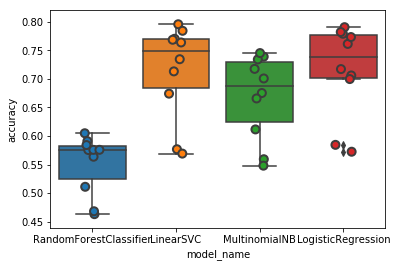

In [34]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [35]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.715020
LogisticRegression        0.716585
MultinomialNB             0.669696
RandomForestClassifier    0.551502
Name: accuracy, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'Product'

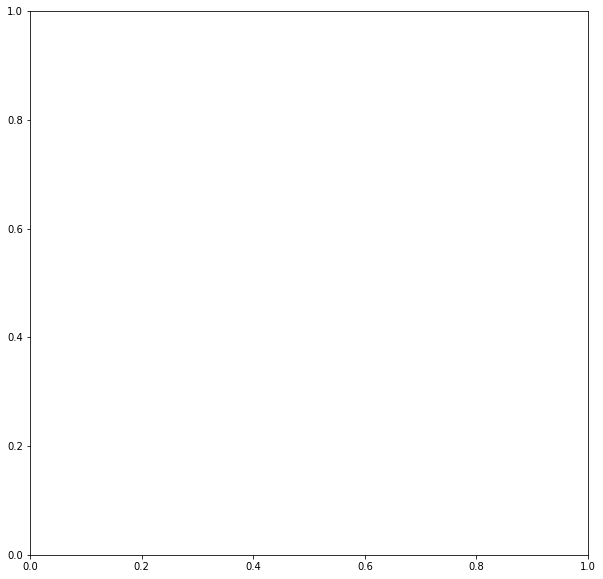

In [36]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.field_name.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['field_name'].unique()))